In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

from matplotlib import pyplot as plt
from scipy import optimize
from sklearn.linear_model import LinearRegression

%matplotlib inline

# 1. Univariate Linear Regression

In [2]:
#reading the data from the file.
data_ex1 = pd.read_csv('/Users/deepanjal.gupta/Documents/Learning/Stanford Machine Learning- Andrew Ng/Week 2/machine-learning-ex1/ex1/ex1data1.txt', header = None )

#giving names to the dataframe columns.
data_ex1.columns = ['Population','Profit']

#adding the x0 feature for the data.
data_ex1['x0'] = 1

#rearranging the dataframe column order. 
data_ex1= data_ex1 [['x0','Population','Profit']]
features_values = np.array(data_ex1[['x0','Population']])
print (data_ex1.head(3))

   x0  Population   Profit
0   1      6.1101  17.5920
1   1      5.5277   9.1302
2   1      8.5186  13.6620


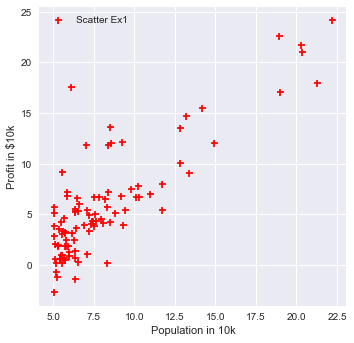

In [3]:

#Plotting the scatter plot
plt.figure(figsize = (5.5,5.5))
plt.grid(True)
plt.scatter(data_ex1['Population'],data_ex1['Profit'],marker = '+',c = 'r',label = 'Scatter Ex1')
plt.xlabel('Population in 10k')
plt.ylabel('Profit in $10k')
plt.legend(loc = 2)
plt.show()

In [4]:
X = np.array(data_ex1[['x0','Population']])
y = np.array(data_ex1[['Profit']]).reshape((97,1))
theta = np.zeros((2,1))
m = y.shape[0]
print     (X.shape)
print     (y.shape)
print (theta.shape)
print (m)


(97, 2)
(97, 1)
(2, 1)
97


In [5]:
def hypothesis(X,theta):
    return np.dot(X,theta)
    #hypothesis(X,theta)
    
    
def cost_function(X,y,theta,m):
    return np.sum(np.square(hypothesis(X,theta) - y))/(2*m)    
    #cost_function(X,y,theta,m)
    
def gradient_descent(alpha,theta,m,X,y):
    theta0 = theta [0,0]
    theta1 = theta [1,0]
    
    theta0 = theta0 - (alpha/float(m))*np.sum(hypothesis(X,theta) - y)
    theta1 = theta1 - (alpha/float(m))*float(np.dot(X.T[1].reshape(1,97),(hypothesis(X,theta) - y),))
    
    return (theta0,theta1)
    

In [6]:
cost_function(X,y,theta,m)

32.072733877455676

In [7]:
theta = np.zeros((2,1))
number = []
value_cost_function = []
alpha = 0.01

for i in range(1,1500):
    number.append(i)
    value_cost_function.append(cost_function(X,y,theta,m))
    answer = gradient_descent(alpha,theta,m,X,y)
    theta [0,0] = answer[0]
    theta [1,0] = answer[1]

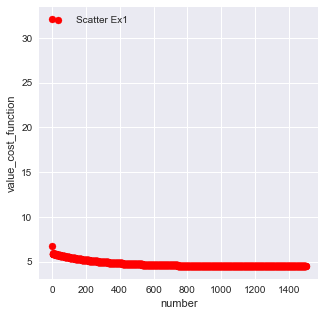

In [8]:
plt.figure(figsize = (5,5))
plt.grid(True)
plt.scatter(number,value_cost_function,marker = 'o',c = 'r',label = 'Scatter Ex1')
plt.xlabel('number')
plt.ylabel('value_cost_function')
plt.legend(loc = 2)
plt.show()

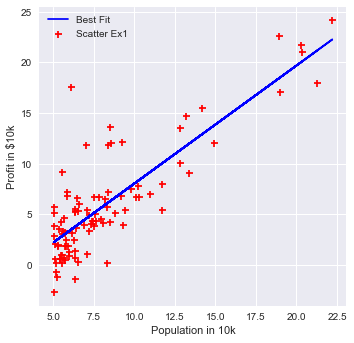

In [9]:
plt.figure(figsize = (5.5,5.5))
plt.grid(True)
plt.scatter(data_ex1['Population'],data_ex1['Profit'],marker = '+',c = 'r',label = 'Scatter Ex1')
plt.plot(data_ex1['Population'],hypothesis(X,theta),marker = '+',c = 'b',label = 'Best Fit')

plt.xlabel('Population in 10k')
plt.ylabel('Profit in $10k')
plt.legend(loc = 2)
plt.show()

In [10]:
theta

array([[-3.62981201],
       [ 1.16631419]])

# 2. Using Sklearn

In [11]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X, y)

print ('intercept:')
print(linreg.intercept_)
print ('')
print ('theta0 and theta 1')
print(linreg.coef_)

#linreg.predict(X)



intercept:
[-3.89578088]

theta0 and theta 1
[[ 0.          1.19303364]]


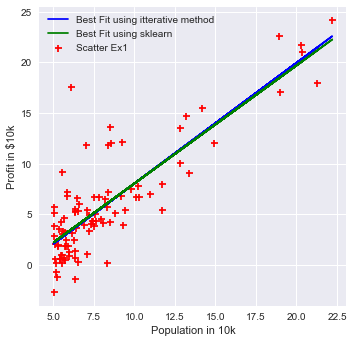

In [12]:
plt.figure(figsize = (5.5,5.5))
plt.grid(True)
plt.scatter(data_ex1['Population'],data_ex1['Profit'],marker = '+',c = 'r',label = 'Scatter Ex1')
plt.plot(data_ex1['Population'],linreg.predict(X),marker = '+',c = 'b',label = 'Best Fit using itterative method')
plt.plot(data_ex1['Population'],hypothesis(X,theta),marker = '+',c = 'g',label = 'Best Fit using sklearn')
plt.xlabel('Population in 10k')
plt.ylabel('Profit in $10k')
plt.legend(loc = 2)
plt.show()

